# Рабочая тетрадь 8. Кластеризация. Иерархическая кластеризация

Сгенерируем 2D-набор данных, содержащий 4 разных больших объекта, а затем применим алгоритм $k$-средних, чтобы увидеть результат.

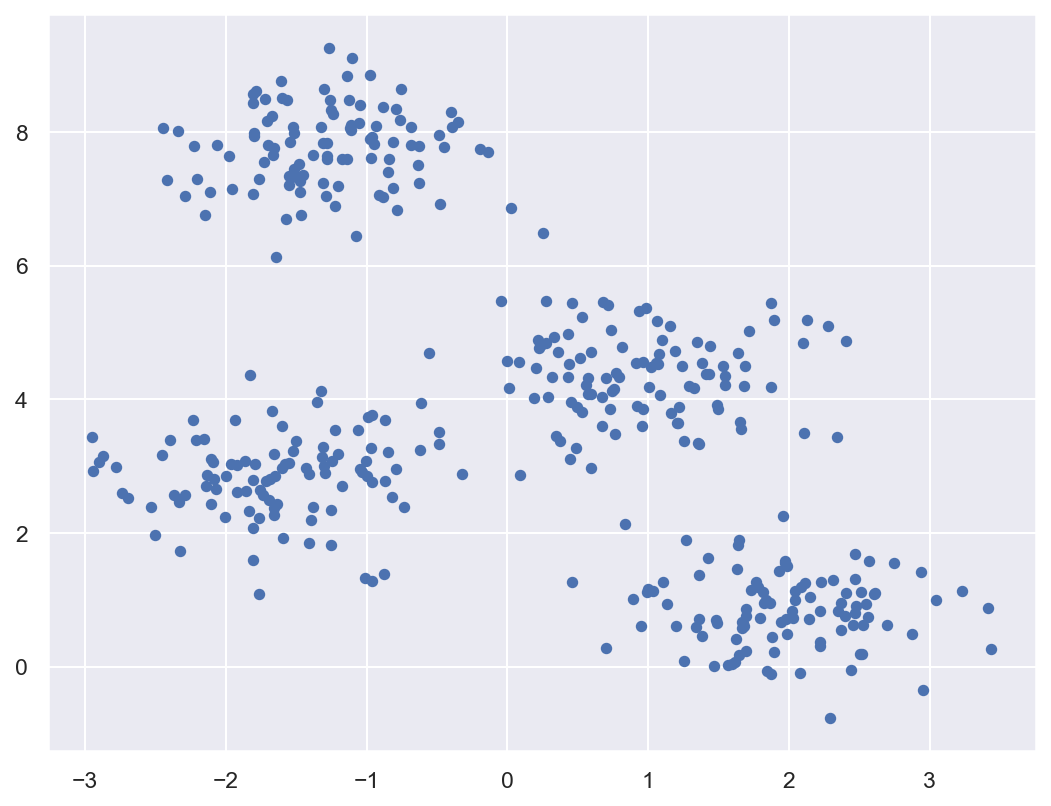

In [1]:
# начнём с импорта необходимых объектов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

# сгенерируем данные
from sklearn.datasets import make_blobs

X, Y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 20)
plt.show()

In [ ]:
# Затем создадим объект KMeans вместе с указанием количества кластеров
# обучим модель и сделаем прогноз следующим образом:

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

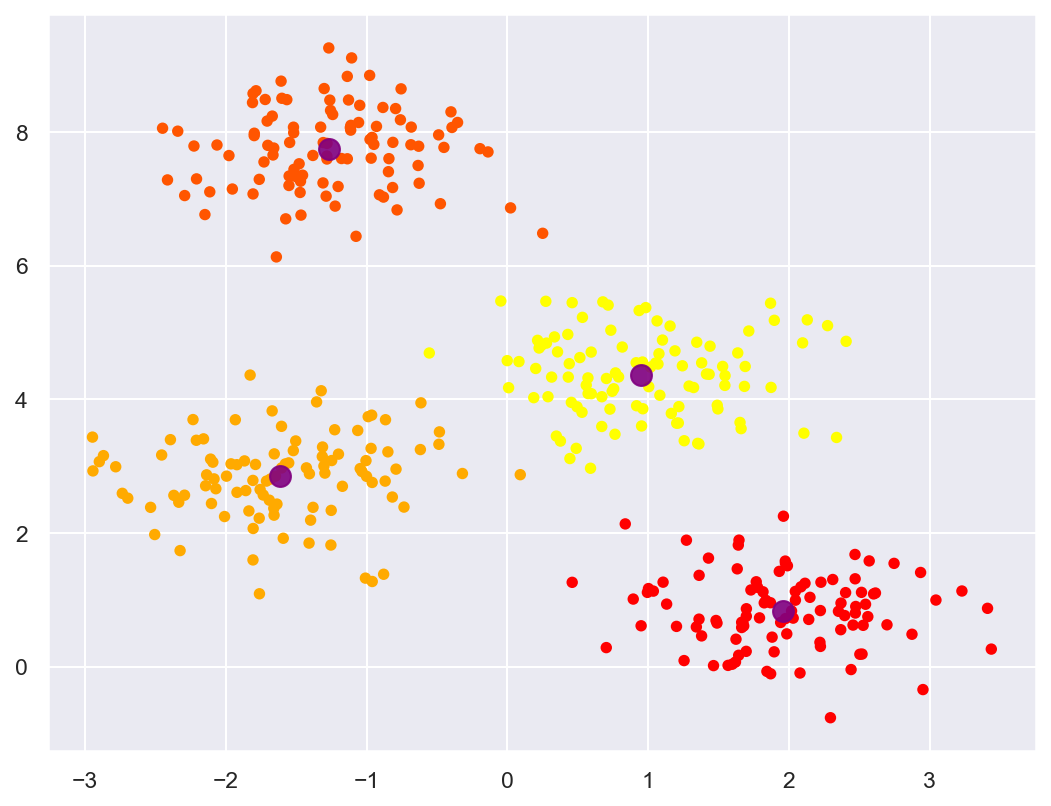

In [2]:
# построим и визуализируем центры кластера, выбранные с помощью k-средних оценки Python
from sklearn.datasets import make_blobs
X, Y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap = 'autumn')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'purple', s = 100, alpha = 0.9)
plt.show()

### 1.1.1 Пример
Проведем кластеризацию K-средних к набору простых цифр. K-means попытается идентифицировать похожие цифры

In [3]:
# начнём с импорта необходимых объектов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

# загрузим набор цифр из sklearn
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
# выполним кластеризацию
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

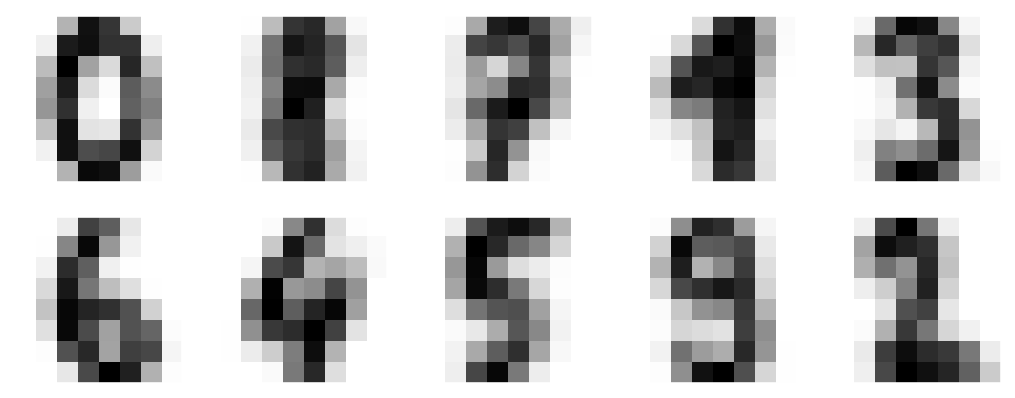

In [5]:
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

### Задание
Дан массив данных:

```
X = np.array([[5,3],
              [10, 15],
              [15, 12],
              [24, 10],
              [30, 45],
              [85, 70],
              [71, 80],
              [60, 78],
              [50, 52],
              [80, 91]])
```
Требуется провести кластерный анализ данных методом k-средних. Поэкспериментируйте с количеством кластеров.

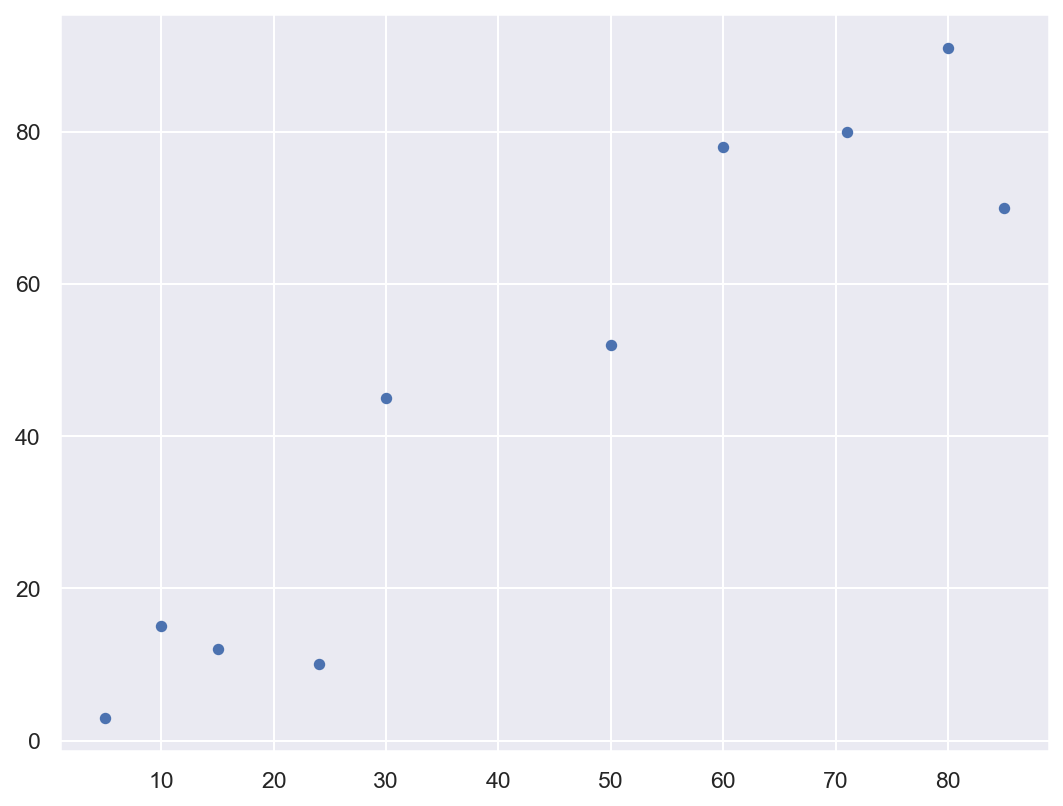

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[5,3],
              [10, 15],
              [15, 12],
              [24, 10],
              [30, 45],
              [85, 70],
              [71, 80],
              [60, 78],
              [50, 52],
              [80, 91]])

plt.scatter(X[:, 0], X[:, 1], s = 20)

In [7]:
# разделим на два кластера
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(X)
clusters = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
centers.shape

(2, 2)

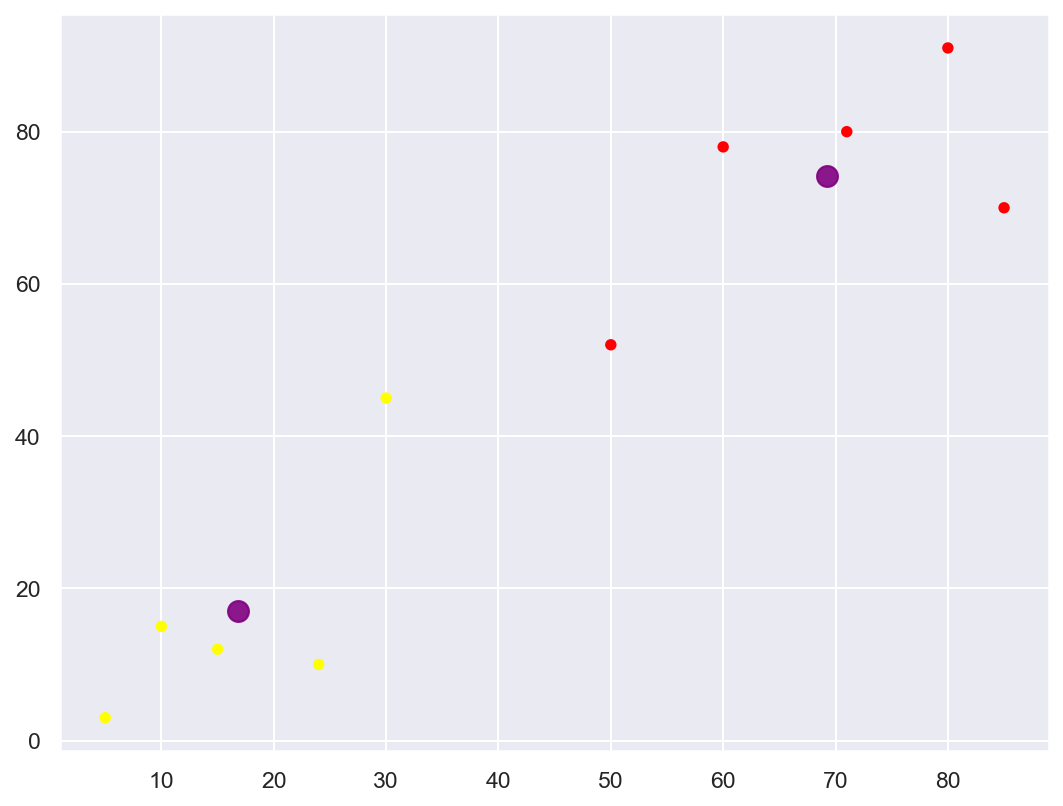

In [8]:
plt.scatter(X[:, 0], X[:, 1], c = clusters, s = 20, cmap = 'autumn')
plt.scatter(centers[:, 0], centers[:, 1], c = 'purple', s = 100, alpha = 0.9)
plt.show()

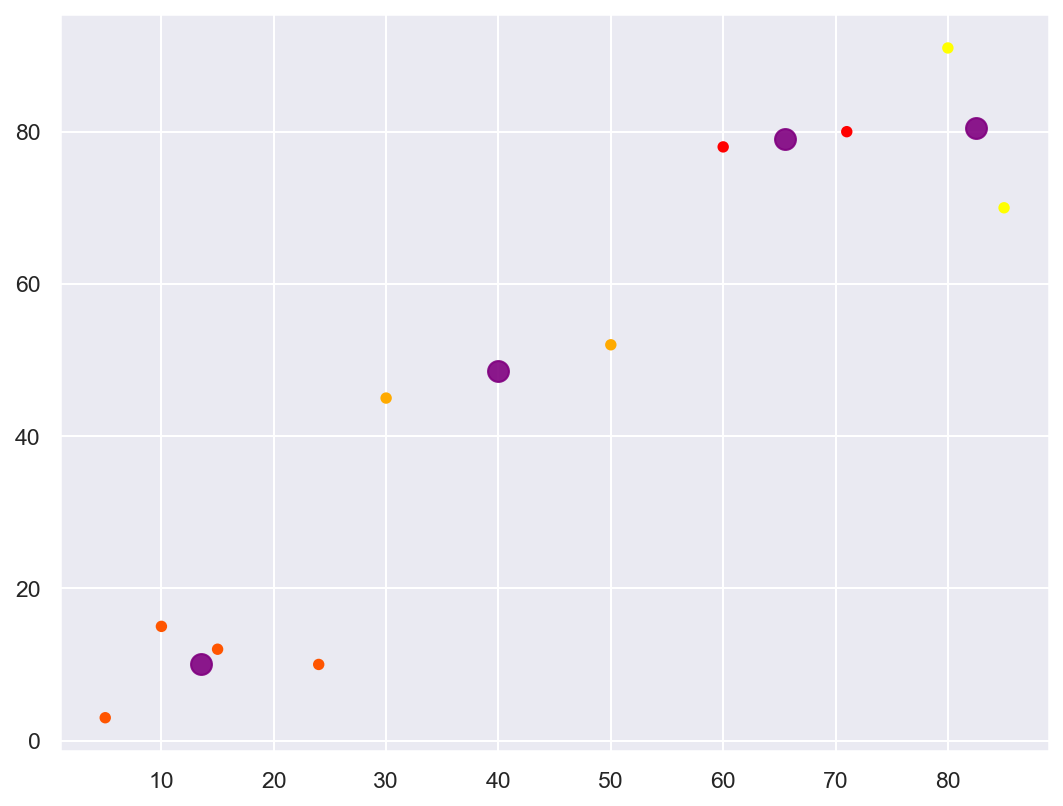

In [9]:
# разделим на 4 кластера
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X)
clusters = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c = clusters, s = 20, cmap = 'autumn')
plt.scatter(centers[:, 0], centers[:, 1], c = 'purple', s = 100, alpha = 0.9)
plt.show()

### Задание
Выполните кластеризацию для набора данных ирисов Фишера. Выполните предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

iris = sns.load_dataset('iris')
iris

     sepal_length  sepal_width  ...  petal_width    species
0             5.1          3.5  ...          0.2     setosa
1             4.9          3.0  ...          0.2     setosa
2             4.7          3.2  ...          0.2     setosa
3             4.6          3.1  ...          0.2     setosa
4             5.0          3.6  ...          0.2     setosa
..            ...          ...  ...          ...        ...
145           6.7          3.0  ...          2.3  virginica
146           6.3          2.5  ...          1.9  virginica
147           6.5          3.0  ...          2.0  virginica
148           6.2          3.4  ...          2.3  virginica
149           5.9          3.0  ...          1.8  virginica

[150 rows x 5 columns]

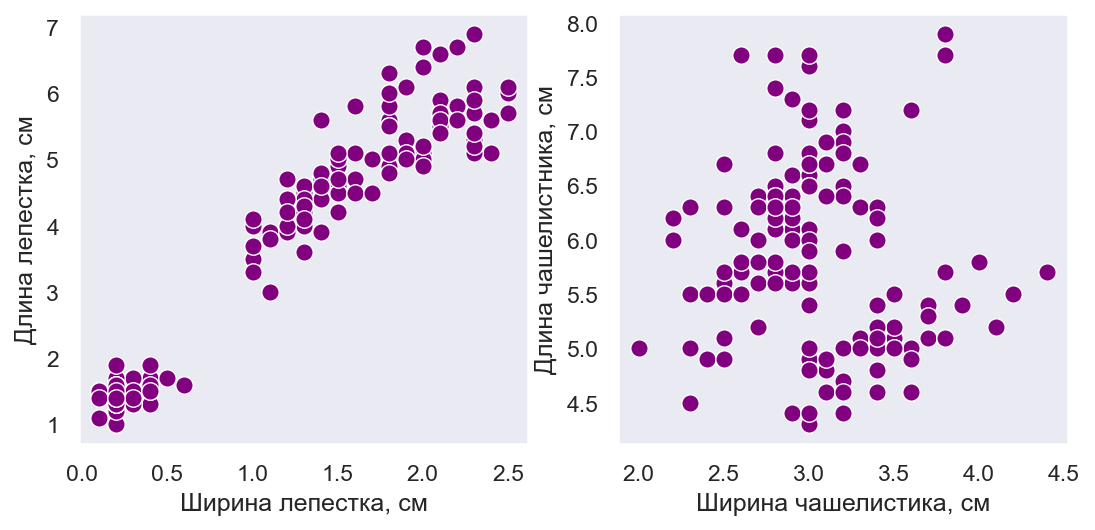

In [11]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(data=iris, x='petal_width', y='petal_length', color = 'purple', s = 70)

plt.xlabel('Ширина лепестка, см')
plt.ylabel('Длина лепестка, см')
plt.grid()

plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', color = 'purple', s = 70)
plt.xlabel('Ширина чашелистика, см')
plt.ylabel('Длина чашелистника, см')
plt.grid()
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(iris.iloc[:, :-1])
clusters = kmeans.fit_predict(iris.iloc[:, :-1])
centers = kmeans.cluster_centers_
centers.shape

(3, 4)

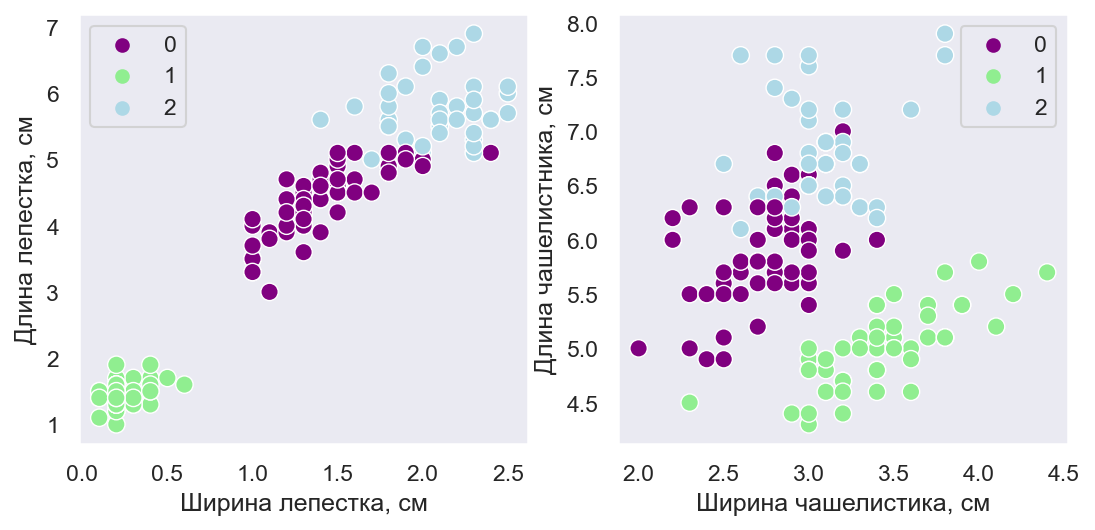

In [13]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(data=iris.iloc[:, :-1], x='petal_width', y='petal_length', hue = clusters, 
                palette = ['purple', 'lightgreen', 'lightblue'], s = 70)

plt.xlabel('Ширина лепестка, см')
plt.ylabel('Длина лепестка, см')
plt.grid()

plt.subplot(122)
sns.scatterplot(data=iris.iloc[:, :-1], x='sepal_width', y='sepal_length', hue = clusters, 
                palette = ['purple', 'lightgreen', 'lightblue'], s = 70)
plt.xlabel('Ширина чашелистика, см')
plt.ylabel('Длина чашелистника, см')
plt.grid()
plt.show()

Попробуем сделать 4 кластера:

In [14]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(iris.iloc[:, :-1])
clusters = kmeans.fit_predict(iris.iloc[:, :-1])
centers = kmeans.cluster_centers_
centers.shape

(5, 4)

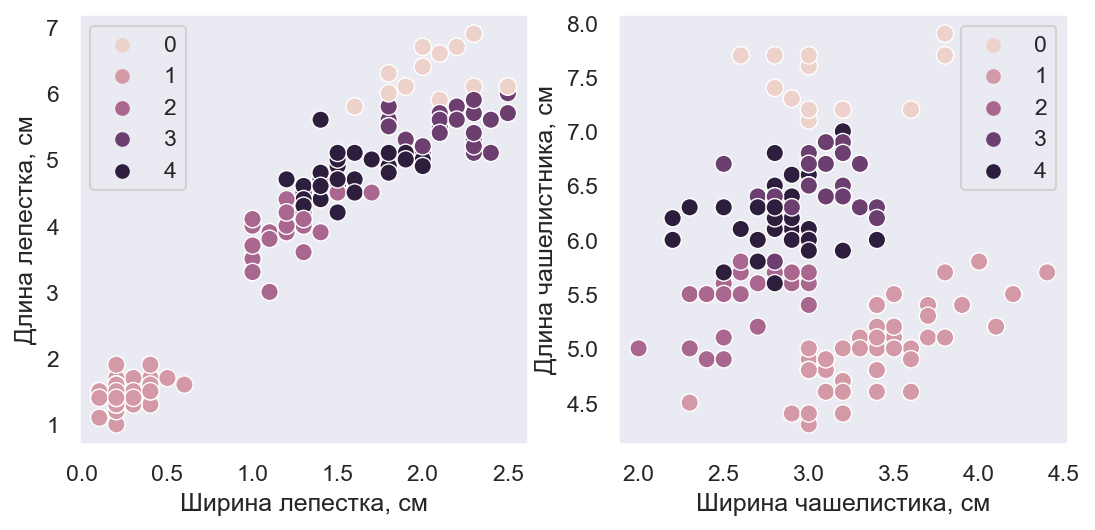

In [15]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(data=iris.iloc[:, :-1], x='petal_width', y='petal_length', hue = clusters, s = 70)

plt.xlabel('Ширина лепестка, см')
plt.ylabel('Длина лепестка, см')
plt.grid()

plt.subplot(122)
sns.scatterplot(data=iris.iloc[:, :-1], x='sepal_width', y='sepal_length', hue = clusters, cmap = 'rainbow', s = 70)
plt.xlabel('Ширина чашелистика, см')
plt.ylabel('Длина чашелистника, см')
plt.grid()
plt.show()

Можно сделать вывод о том, что при неадекватном указании количества кластеров, результаты работы алгоритма станут бесполезными

### Иерархическая кластеризация
Алгомеративная кластеризация относится к семейству алгоритмов кластеризации, в основе которых лежат одинаковые принципы: алгоритм начинает свою работу с того, что каждую точку данных заносит в свой собственный кластер и по мере выполнения объединяет два наиболее схожих между собой кластера до тех пор, пока не будет удовлетворен определенный критерий остановки. Зачастую данным критерием выступает это количество кластеров, поэтому схожие между собой кластеры объединяются до тех пор, пока не останется заданное число кластеров.


Результатом агломеративной кластеризации является иерархическая кластеризация. Кластеризация выполняется итеративно, и каждая точка совершает путь от отдельной точки-кластера до участника итогового кластера. На каждом промежуточном шаге происходит кластеризация данных (с разным количеством кластеров). Иногда полезно сразу взглянуть на все возможные кластеризации. Следующий пример показывает наложение всех возможных кластеризаций, показанных на рис. и дает некоторое представление о том, как каждый кластер распадается на более мелкие кластеры.

### 1.1.2 Пример
Построить дендрограмму для заданного массива данных:

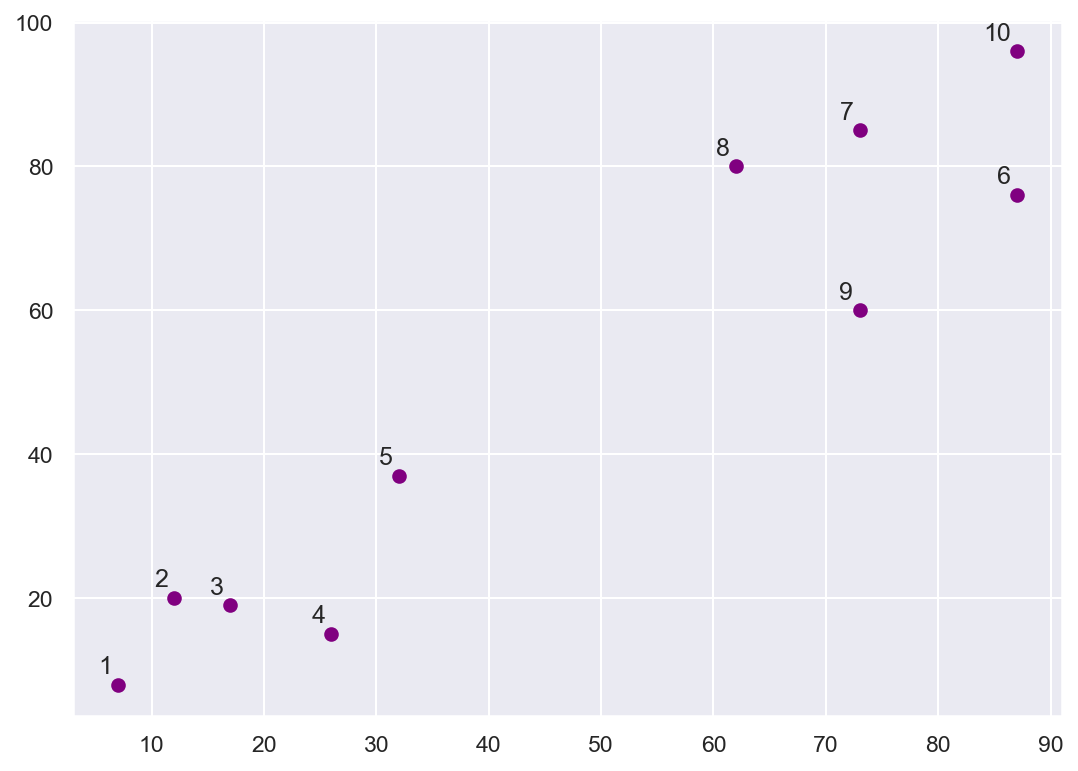

In [16]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [[7,8],[12,20],[17,19],[26,15],[32,37],[87,76],[73,85],[62,80],[73,60],[87,96]])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
sns.set_style('dark')
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:, 0], X[:, 1], label = 'True Position', color = 'purple')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label, xy= (x, y), xytext = (-3, 3), textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.grid()
plt.show()

Далее построим дендрограмму для точек данных с помощью библиотеки Scipy

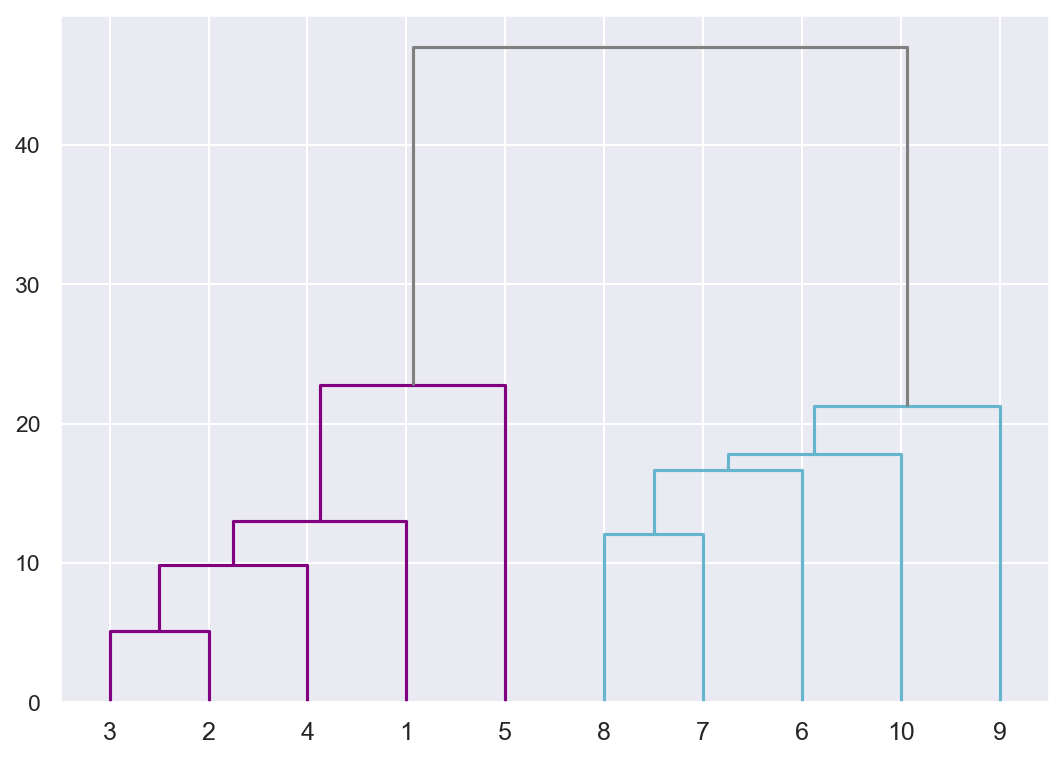

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
import matplotlib.pyplot as plt
set_link_color_palette(['purple', 'c'])
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top', labels = labelList,
          distance_sort = 'descending', above_threshold_color='grey', show_leaf_counts = True)
plt.grid()
plt.show()

Далее нам нужно импортировать класс для кластеризации и вызвать его метод fit_predict для прогнозирования кластера.

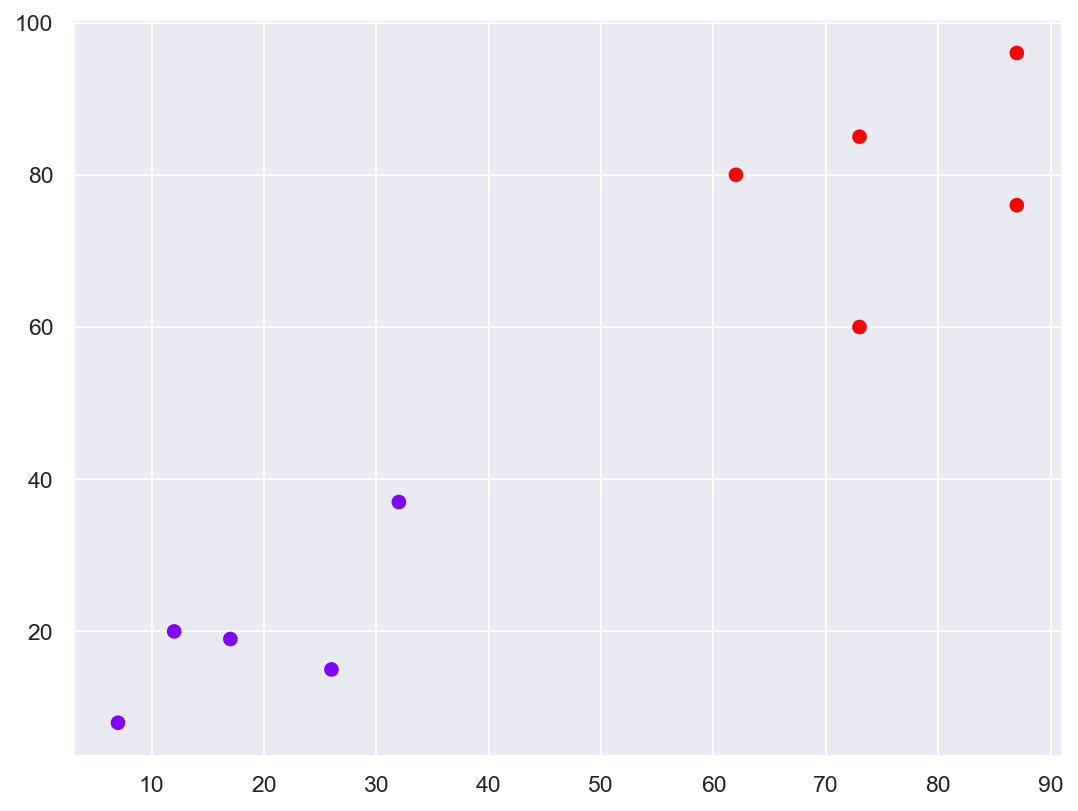

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:, 1], c = cluster.labels_, cmap = 'rainbow')
plt.grid()

### Пример
В этом примере мы выполним иерархическую кластеризацию реальных данных и посмотрим, как ее можно использовать для решения реальной проблемы. Выполним кластеризацию данных по [набору](https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv).

Задача, которую мы собираемся решить в этом разделе, состоит в том, чтобы разделить клиентов на разные группы в зависимости от их покупательских тенденций.

In [19]:
# импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# загрузим набор данных
url = "https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv"
customer_data = pd.read_csv(url)
customer_data.head()

   CustomerID  ... Spending Score (1-100)
0           1  ...                     39
1           2  ...                     81
2           3  ...                      6
3           4  ...                     77
4           5  ...                     40

[5 rows x 5 columns]

In [20]:
customer_data.shape

(200, 5)

Наш набор данных состоит из пяти столбцов. Чтобы просмотреть результаты в двумерном пространстве, мы сохраним только два из них:«Годовой доход» (в тысячах долларов) и «Оценка расходов» (1–100). Столбец «Оценка расходов» показывает, как часто человек тратит деньги в торговом центре по шкале от 1 до 100, где 100 — это самый высокий расход. Выполним следующий скрипт, чтобы отфильтровать первые три столбца из нашего набора данных:

In [ ]:
data = customer_data.iloc[:, 3:5].values

Далее нам нужно знать кластеры, на которые мы хотим разделить наши данные. Мы снова будем использовать библиотеку scipy для создания дендрограммы:

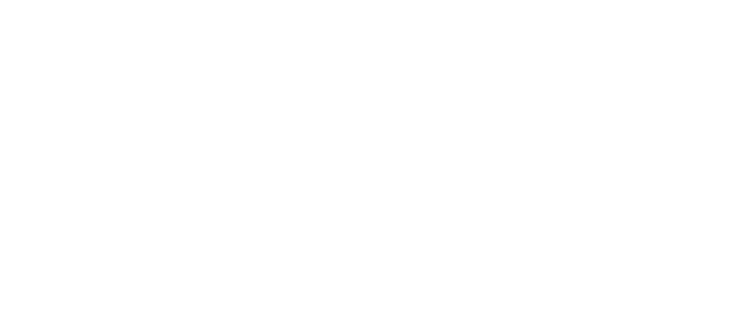

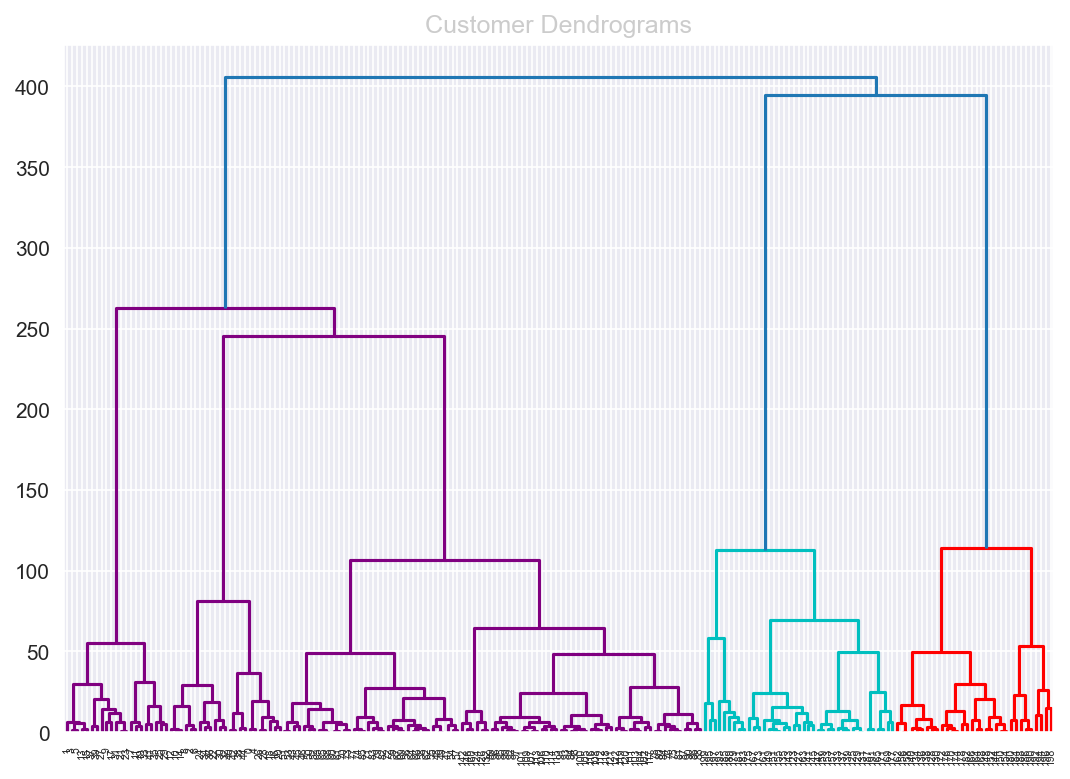

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28,12), dpi = 180)
plt.figure(figsize=(10,7))
sns.set_style('dark')
shc.set_link_color_palette(['purple', 'c', 'red'])
plt.title('Customer Dendrograms')
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.grid()

Если мы нарисуем горизонтальную линию, которая проходит через самое длинное расстояние без горизонтальной линии, мы получим 5 кластеров. Теперь мы знаем количество кластеров для нашего набора данных, следующим шагом будет группировка точек данных в эти пять кластеров. 

Для этого мы снова воспользуемся классом AgglomerativeClustering библиотеки sklearn.cluster.

In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

В качестве последнего шага давайте построим кластеры, чтобы увидеть, как на самом деле были сгруппированы наши данные:

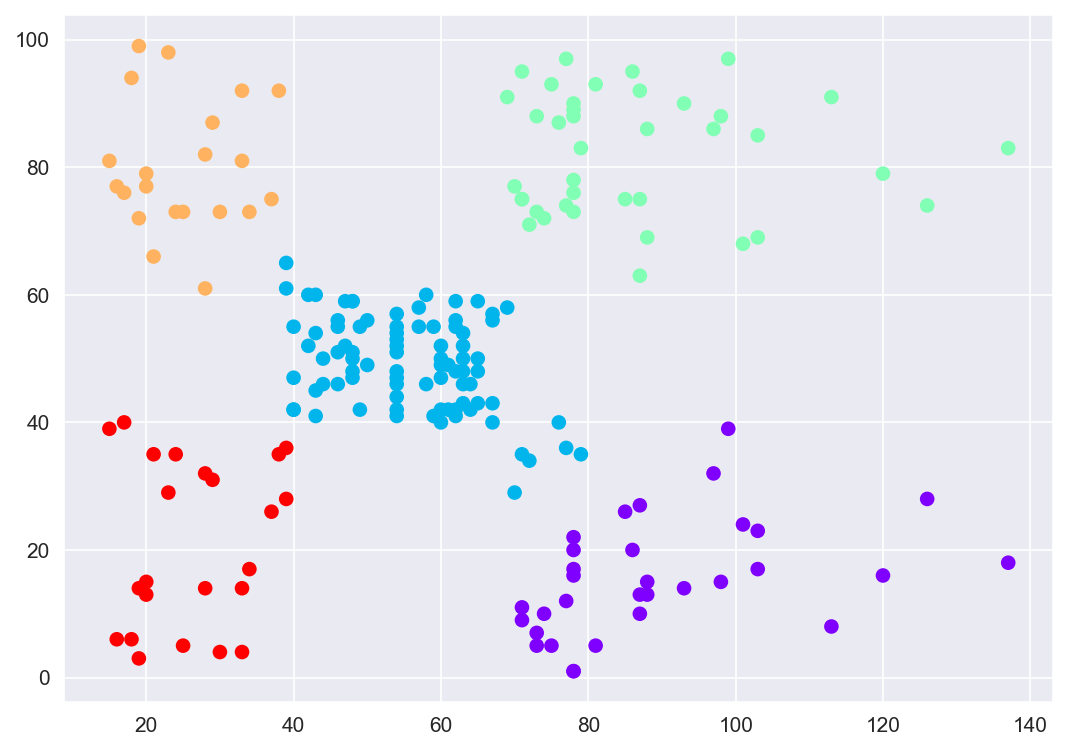

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c = cluster.labels_,cmap='rainbow')
plt.grid()

### Задание
Задание. Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (всего их четыре).

In [24]:
iris = sns.load_dataset('iris')
iris

     sepal_length  sepal_width  ...  petal_width    species
0             5.1          3.5  ...          0.2     setosa
1             4.9          3.0  ...          0.2     setosa
2             4.7          3.2  ...          0.2     setosa
3             4.6          3.1  ...          0.2     setosa
4             5.0          3.6  ...          0.2     setosa
..            ...          ...  ...          ...        ...
145           6.7          3.0  ...          2.3  virginica
146           6.3          2.5  ...          1.9  virginica
147           6.5          3.0  ...          2.0  virginica
148           6.2          3.4  ...          2.3  virginica
149           5.9          3.0  ...          1.8  virginica

[150 rows x 5 columns]

In [25]:
customer_data = iris.iloc[:,2:4].values
customer_data.shape

(150, 2)

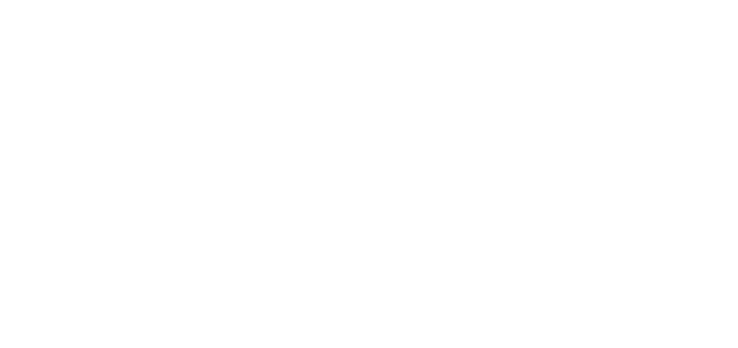

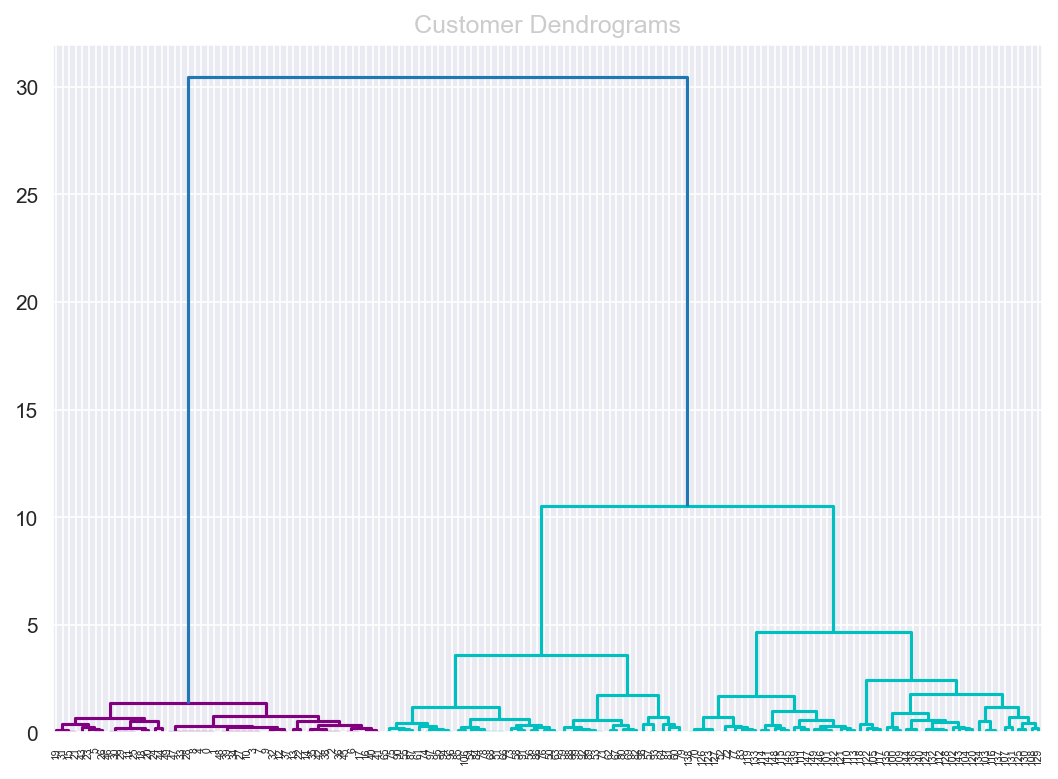

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,9), dpi = 180)
plt.figure(figsize=(10,7))
sns.set_style('dark')
shc.set_link_color_palette(['purple', 'c'])
plt.title('Customer Dendrograms')
dend = shc.dendrogram(shc.linkage(customer_data, method='ward'))
plt.grid()

In [27]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(customer_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

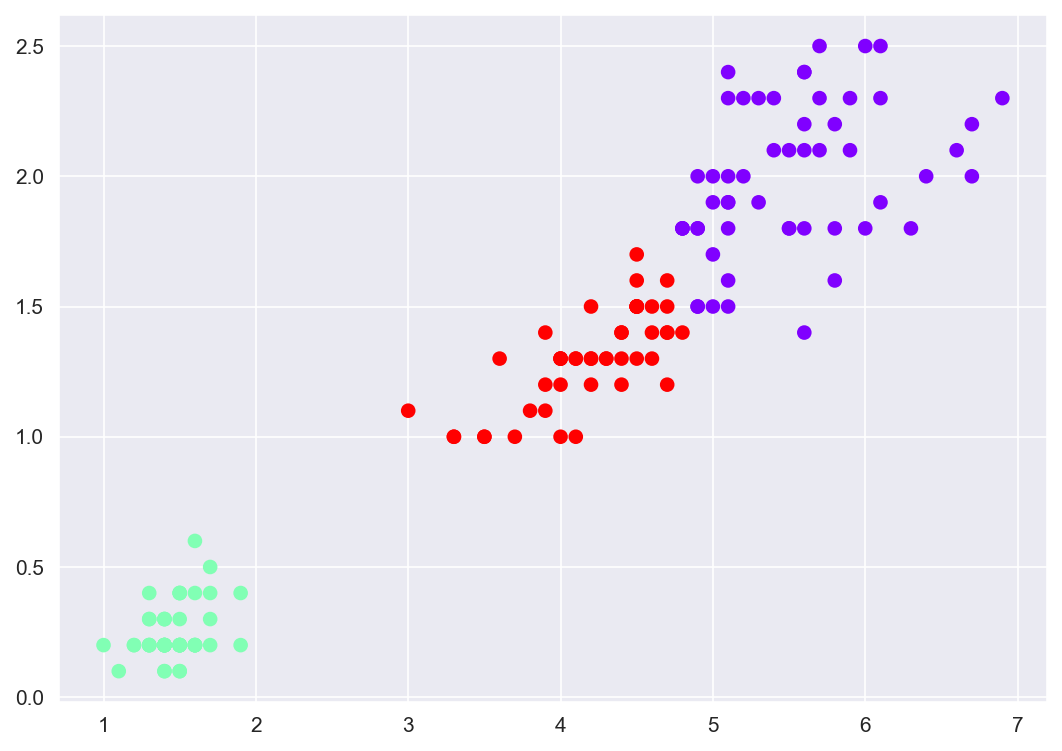

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(customer_data[:,0], customer_data[:,1], c = cluster.labels_,cmap='rainbow')
plt.grid()